In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 2024

# Paths

In [23]:
dataset = 'Data/mano_keypoint.csv'
modelo_path = 'Modelos/Sign_classifier_V2.keras'
tflite_path = 'Modelos/Sign_classifier_V2.tflite'

In [ ]:
dataset

# Clases

In [9]:
CLASES=[' ','a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u', 'v', 'w', 'x', 'y', 'z']
NUM_CLASES = len(CLASES)

# Leer el dataset

In [10]:
#Cargar los datos desde la segunda columna hasta la última
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [11]:
#Cargar los datos de la primera columna
y_dataset = np.loadtxt(dataset, delimiter=',', dtype=str, usecols=(0))
# Obtener las clases y sus conteos
valores_unicos, conteos = np.unique(y_dataset, return_counts=True)
pd.DataFrame({'Clase': valores_unicos, 'Conteo': conteos})

,Clase,Conteo
0,,374
1,a,300
2,b,300
3,c,300
4,d,300
5,e,300
6,f,300
7,g,300
8,h,300
9,i,300


In [12]:
#Codificar las clases
y_dataset = np.array([CLASES.index(y) for y in y_dataset])

In [13]:
#Dividir el conjunto de prueba y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.7, random_state=RANDOM_SEED)

# Configuracion del modelo

In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )), #21 caracteristicas por cada entrada 2 dimensiones
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASES, activation='softmax')
])

In [15]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 50)                2150      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 30)                1530      
                                                                 
 dense_2 (Dense)             (None, 27)                837       
                                                                 
Total params: 4,517
Trainable params: 4,517
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Guardar checkpoints durante el entrenamiento
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    modelo_path, verbose=1, save_weights_only=False)
# Early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=40, verbose=1)

In [17]:
# Generacion del modelo
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Entrenamiento

In [18]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
34/45 [=====================>........] - ETA: 0s - loss: 3.2821 - accuracy: 0.0591
Epoch 1: saving model to Modelos\Sign_classifier_V2.hdf5
45/45 [==============================] - 3s 9ms/step - loss: 3.2700 - accuracy: 0.0662 - val_loss: 3.1769 - val_accuracy: 0.1280
Epoch 2/1000
33/45 [=====================>........] - ETA: 0s - loss: 3.1485 - accuracy: 0.1046
Epoch 2: saving model to Modelos\Sign_classifier_V2.hdf5
45/45 [==============================] - 0s 5ms/step - loss: 3.1203 - accuracy: 0.1075 - val_loss: 2.9051 - val_accuracy: 0.1773
Epoch 3/1000
37/45 [=======================>......] - ETA: 0s - loss: 2.8868 - accuracy: 0.1518
Epoch 3: saving model to Modelos\Sign_classifier_V2.hdf5
45/45 [==============================] - 0s 5ms/step - loss: 2.8612 - accuracy: 0.1552 - val_loss: 2.5655 - val_accuracy: 0.2911
Epoch 4/1000
23/45 [==============>...............] - ETA: 0s - loss: 2.6647 - accuracy: 0.1899
Epoch 4: saving model to Modelos\Sign_classifier_V2.hdf5
4

In [19]:
# Evaluación del modelo
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

20/20 [==============================] - 0s 2ms/step - loss: 0.0935 - accuracy: 0.9829


In [20]:
# Carga del modelo
model = tf.keras.models.load_model(modelo_path)

In [21]:
# Clasificacion
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))


1/1 [==============================] - 0s 63ms/step
[3.2229823e-06 5.8225814e-02 6.1870425e-10 3.2715334e-08 5.0338048e-07
 6.5056689e-02 1.8287992e-06 8.2935372e-08 1.3206584e-10 2.9235629e-05
 6.8836050e-07 6.6842324e-16 9.3363303e-12 1.6045055e-03 3.4207808e-06
 1.3399741e-04 5.6446785e-11 3.7348193e-06 5.0183170e-11 8.3127928e-01
 4.3595273e-02 1.9159445e-09 1.4142258e-08 4.8678599e-09 3.3328153e-08
 6.1552426e-05 1.8042190e-08]
19


# Matriz de confusion y métricas de rendimiento

77/77 [==============================] - 0s 749us/step


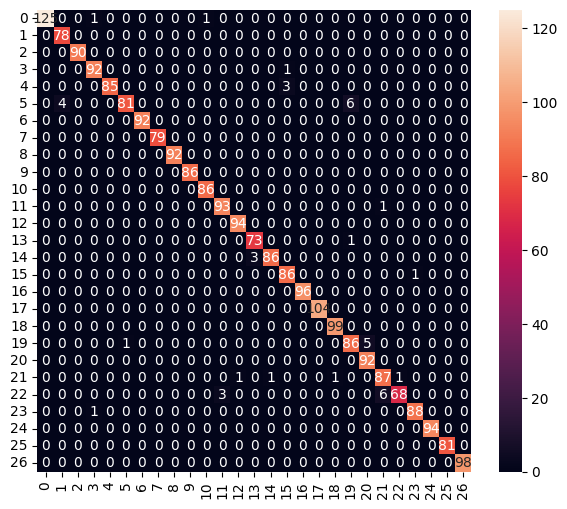

Metricas de rendimiento
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       127
           1       0.95      1.00      0.97        78
           2       1.00      1.00      1.00        90
           3       0.98      0.99      0.98        93
           4       1.00      0.97      0.98        88
           5       0.99      0.89      0.94        91
           6       1.00      1.00      1.00        92
           7       1.00      1.00      1.00        79
           8       1.00      1.00      1.00        92
           9       1.00      1.00      1.00        86
          10       0.99      1.00      0.99        86
          11       0.97      0.99      0.98        94
          12       0.99      1.00      0.99        94
          13       0.96      0.99      0.97        74
          14       0.99      0.97      0.98        89
          15       0.96      0.99      0.97        87
          16       1.00      1.00      1.00        96
   

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
#Generacion de matriz de confusion y reporte de clasificacion
def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Metricas de rendimiento')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convertir el modelo a Tensorflow-Lite

In [24]:
# Guardar el modelo en formato keras
model.save(modelo_path)

In [26]:

# Crear un convertidor TFLite a partir del modelo de Keras
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Configurar el convertidor para aplicar optimizaciones de cuantización
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Generar el modelo cuantizado
tflite_quantized_model = converter.convert()

# Guardar el modelo cuantizado en un archivo
open(tflite_path, 'wb').write(tflite_quantized_model)
#open('Modelos/Clasificador_gestos99.tflite', 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\juanj\AppData\Local\Temp\tmp5ipln8c5\assets


INFO:tensorflow:Assets written to: C:\Users\juanj\AppData\Local\Temp\tmp5ipln8c5\assets


9488

# Prueba de modelo

In [27]:
# Crear un intérprete de TensorFlow Lite a partir de un modelo TFLite
interpreter = tf.lite.Interpreter(model_path=tflite_path)

# Asignar tensores al intérprete
interpreter.allocate_tensors()

In [28]:
# Obtener los detalles de entrada y salida del intérprete
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [29]:
# Establecer el tensor de entrada del intérprete de TensorFlow Lite con el primer elemento de X_test
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [30]:
%%time
# Detalles del uso del modelo

# Invocar el intérprete para realizar la inferencia
interpreter.invoke()
# Obtener los resultados de la inferencia del tensor de salida
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 5 ms


In [31]:
# Imprimir los resultados de la inferencia del modelo TFLite
print(np.squeeze(tflite_results))

# Imprimir el índice del valor máximo en los resultados, que corresponde a la clase predicha
print(np.argmax(np.squeeze(tflite_results)))

[4.6447872e-06 6.3556276e-02 6.1827649e-10 3.4670958e-08 4.7994655e-07
 6.6872515e-02 2.5470270e-06 6.2975410e-08 2.1736730e-10 3.1686737e-05
 7.2644559e-07 3.4807114e-16 7.6485936e-12 1.2931591e-03 2.1036185e-06
 1.4213094e-04 7.1536173e-11 3.7141251e-06 3.2895769e-11 8.3040202e-01
 3.7616536e-02 1.7496636e-09 1.4210002e-08 4.7000599e-09 1.9659668e-08
 7.1338000e-05 1.2552033e-08]
19
